In [97]:
from mxnet import ndarray as nd
from mxnet import gluon
from mxnet import autograd
num_inputs=200
num_train = 20
num_test = 100

In [98]:
#define parameter
true_w = nd.ones((num_inputs, 1)) * 0.01
true_b=0.05

def init_params():
    w = nd.random_normal(scale=1, shape=(num_inputs, 1))
    b = nd.zeros(shape=(1,))
    params = [w, b]
    for param in params:
        param.attach_grad()
    return params

In [99]:
#define function 
x=nd.random.normal(shape=(num_train+num_test,num_inputs))
#为什么shape=(num_train+num_test,num_inputs)，它是把全部的x放在同一个篮子里，然后train的数集从里面取x[:num_train,:]
#剩下的就是train的数集x[num_train:,:]
y=nd.dot(x,true_w)
y+=0.1*nd.random.normal(shape=y.shape)

x_train,x_test=x[:num_train,:],x[num_train:,:]
y_train,y_test=x[:num_train,:],y[num_train:,:]



In [100]:
#iteration
import random
batch_size=10
def data_iter(num_examples):
    idx=list(range(num_examples))
    random.shuffle(idx)
    for i in range(0,num_examples,batch_size):
        j=nd.array(idx[i:min(i+batch_size,num_examples)])
        yield x.take(j),y.take(j)


In [101]:
#define l2 norm
def l2_penalty(w,b):
    return ((w**2).sum() + b**2) / 2



In [102]:
# define cost function and sgd and entropy_cross cost funtcion
def net(x,w,b):
    return nd.dot(x,w)+b

def SGD(params,batch_size,lr):
    for param in params: 
        param[:] = param - lr * param.grad / batch_size
        
def square_loss(yhat, y):
    return (yhat - y.reshape(yhat.shape)) ** 2 / 2 #为什么要除以2？

def test(net, params, x, y): 
    return square_loss(net(x, *params), y).mean().asscalar()


    

In [103]:
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 120
import matplotlib.pyplot as plt
import numpy as np


#define function 
def train(lambd):
    epochs = 100
    learning_rate = 0.05
    w, b = params = init_params() #这个为什么这样子编写？什么意思？
    train_loss = []
    test_loss = []
    for e in range(epochs):
        for data,label in data_iter(num_train):
            with autograd.record():
                output=net(data,*params)#为啥要加一个*params？主要用于函数定义
                #这里的不定的意思是：预先并不知道, 函数使用者会传递多少个参数给你, 所以在这个场景下使用这两个关键字？
                loss=square_loss(output, label) + lambd * L2_penalty(*params)
            loss.backward()
            SGD(params,learning_rate,batch_size)
            
        train_loss.append(test(net, params, x_train, y_train))
        #test for what？什么意思这个？
        #在前面有定义test
        test_loss.append(test(net, params, x_test, y_test))
        
        plt.plot(train_loss)
        plt.plot(test_loss)
        plt.legend(['train', 'test'])
        plt.show()
        return 'learned w[:10]:', w[:10].T, 'learned b:', b
                
  
    

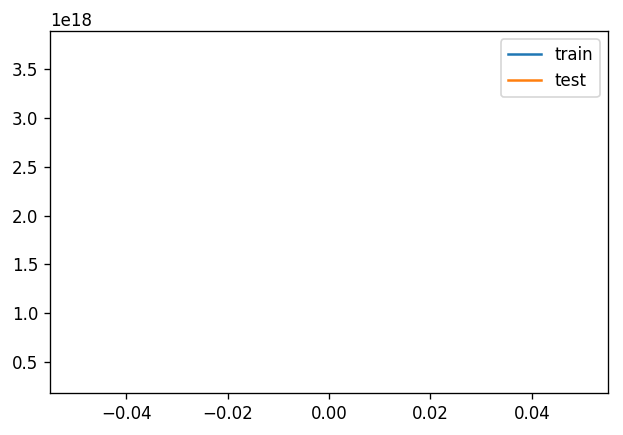

('learned w[:10]:', 
 [[  1.04123168e+08   3.58750240e+07   7.73556880e+07  -3.78494960e+07
     7.84975040e+07  -3.09249580e+07   8.50239920e+07  -9.39013062e+05
     6.95040560e+07   4.71972400e+07]]
 <NDArray 1x10 @cpu(0)>, 'learned b:', 
 [-28475680.]
 <NDArray 1 @cpu(0)>)

In [104]:
train(0)

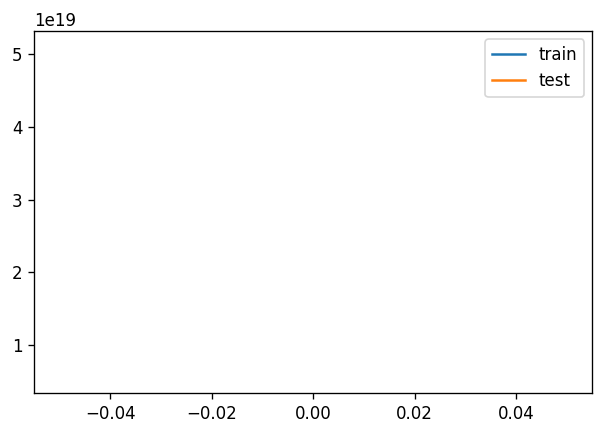

('learned w[:10]:', 
 [[ -1.74307744e+08   9.97045040e+07   1.79442896e+08  -1.38575408e+08
    -1.50902064e+08  -4.71885216e+08   3.21139488e+08   6.94212240e+07
    -2.47377376e+08   6.27760320e+07]]
 <NDArray 1x10 @cpu(0)>, 'learned b:', 
 [  1.23873736e+08]
 <NDArray 1 @cpu(0)>)

In [105]:
train(5)